# Exploratory Visualization

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import sklearn

from pathlib import Path

## Retrieve and Subset Datasource

Retrieve all good trials for IDs that came from Javier's algorithm.

In [4]:
notebook_song_name = 'into_dust'

In [6]:
data_root = Path('../../neural_nets/fastai/import-dust-new-split-no-nrs/data')

df_all = pd.read_csv(data_root / 'good_reaction_trials_categorified_q90_javier_all_no_nrs_no_impute.csv')

df_all = df_all[df_all.song == notebook_song_name]

pd.set_option('display.max_columns', None)
df_all.describe()

,age,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,musical_expertise,concentration,control_power,control_like_dislike,control_tension,control_engagement,control_activity,control_positivity,control_familiarity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,visual_impairments,song_chillsshiversthrills,song_transcendence,song_sadness,song_wonder,song_joyfulactivation,song_tenderness,song_peacefulness,song_nostalgia,musicpref_dance,musicpref_rock,musicpref_jazz,musicpref_pop,musicpref_classical,musicpref_hiphop,musicpref_folk,musicpref_traditional_irish,musicpref_hip_hop,musicpref_world
count,165.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,111.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,72.000000,144.000000,156.000000,144.000000,144.000000,144.000000,144.000000,0.0,84.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,26.963636,3.783333,2.416667,3.866667,3.066667,3.233333,3.533333,3.250000,3.650000,3.116667,3.150000,2.594595,3.866667,3.050000,2.916667,3.333333,3.016667,2.883333,3.083333,-1.0,3.277778,3.277778,3.942308,3.222222,3.465278,3.222222,1.916667,NaN,1.750000,2.916667,3.083333,3.416667,1.750000,3.500000,3.750000,2.916667,0.224242,0.551515,0.169697,0.660606,0.327273,0.036364,0.018182,0.109091,0.151515,0.230303
std,14.383210,1.026623,1.331390,1.016252,1.219428,1.184171,1.241468,1.283863,1.132344,1.222552,1.190713,1.047754,1.111827,1.156045,1.356612,1.188457,1.185958,1.075011,1.154089,0.0,1.345019,1.371256,1.159757,1.401520,1.070345,1.173391,1.214712,NaN,1.062788,1.164500,1.240112,0.792961,0.753778,0.797724,0.965307,0.996205,0.418352,0.498853,0.376509,0.474945,0.470646,0.187763,0.134015,0.312702,0.359642,0.422308
min,9.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,-1.0,2.000000,2.000000,4.000000,2.000000,3.000000,2.000000,1.000000,NaN,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,-1.0,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,1.000000,NaN,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,4.000000,3.250000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.250000,4.000000,-1.0,4.000000,4.250000,5.000000,4.000000,4.000000,4.000000,3.000000,NaN,2.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.250000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,81.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,-1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,5.0000

In [7]:
df_reaction = df_all[df_all['critical_reaction'] == True]
df_no_reaction = df_all[df_all['critical_reaction'] == False]

In [8]:
df_all.columns

Index(['_id', 'location', 'language', 'nationality', 'age', 'sex',
       'hearing_impairments', 'personality_trusting', 'personality_artistic',
       'personality_imagination', 'personality_reserved',
       'personality_outgoing', 'personality_lazy', 'personality_stress',
       'personality_nervous', 'personality_fault', 'personality_thorough',
       'musical_expertise', 'concentration', 'critical_reaction',
       'control_power', 'control_like_dislike', 'control_tension',
       'control_engagement', 'control_activity', 'control_positivity',
       'control_familiarity', 'song_power', 'song_like_dislike',
       'song_tension', 'song_engagement', 'song_activity', 'song_positivity',
       'song_familiarity', 'musical_background', 'visual_impairments',
       'song_chillsshiversthrills', 'song_transcendence', 'song_sadness',
       'song_wonder', 'song_joyfulactivation', 'song_tenderness',
       'song_peacefulness', 'song_nostalgia', 'song', 'musicpref_dance',
       'musicpref_

In [9]:
cat_cols = ['location', 'language', 'nationality', 'sex', 'hearing_impairments']

ord_cols = ['personality_trusting', 'personality_artistic', 'personality_imagination', 'personality_reserved', 
            'personality_outgoing', 'personality_lazy', 'personality_stress', 'personality_nervous', 
            'personality_fault', 'personality_thorough', 'musical_expertise', 'concentration', 'song_power', 
            'song_like_dislike', 'song_tension', 'song_engagement', 'song_activity', 'song_positivity', 
            'song_familiarity', 'musical_background', 'song_chillsshiversthrills', 'musicpref_rock', 
            'musicpref_traditional_irish', 'musicpref_hip_hop', 'musicpref_jazz', 'musicpref_pop', 
            'musicpref_hiphop', 'musicpref_world', 'musicpref_none', 'musicpref_classical', 'musicpref_folk', 
            'musicpref_dance']

cont_cols = ['age']

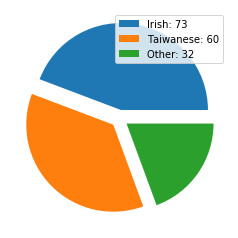

In [10]:
nationality_counts = df_all['nationality'].value_counts()
patches, texts = plt.pie(nationality_counts, 
                                    explode=[0.1] * len(nationality_counts));

labels = ['{}: {}'.format(x.capitalize(), nationality_counts[x]) for x in nationality_counts.index]

plt.legend(patches, labels)
plt.savefig('hallelujah_reaction_pie_nationalities_redux_{}.pdf'.format(notebook_song_name))

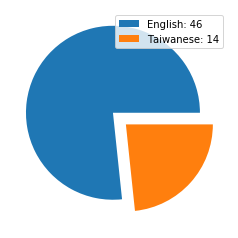

In [11]:
language_counts = df_all['language'].value_counts()
patches, texts = plt.pie(language_counts, 
                                    explode=[0.1] * len(language_counts));

languages = list(language_counts.index)
for i in range(len(languages)):
    language = languages[i]
    if language == 'en':
        languages[i] = 'English'
    elif language == 'zh_TW':
        languages[i] = 'Taiwanese'

labels = ['{}: {}'.format(languages[i].capitalize(), language_counts[x]) for i, x in enumerate(language_counts.index)]

plt.legend(patches, labels)
plt.savefig('hallelujah_reaction_pie_languages_redux_{}.pdf'.format(notebook_song_name))

In [12]:
def mardia(data, unbiased_cov=True):
    """
    data should have observations in rows
    """
    import numpy as np
    import scipy.stats as sps
    
    n = data.shape[0]
    p = data.shape[1]

    S = None
    if unbiased_cov:
        S = ((n - 1.) / n) * np.cov(data, rowvar=False)
    else:
        S = np.cov(data, rowvar=False)

    data_scaled = (data - data.mean(axis=0))

    D = np.matmul(np.matmul(data_scaled, np.linalg.pinv(S, rcond=1e-25)), data_scaled.T)

    product = D * D * D
    skewness = np.sum(product) / n**2
    kurtosis = (D * D).diagonal().sum() / n
    df = p * (p + 1) * (p + 2) / 6
    k = ((p + 1)*(n + 1)*(n + 3))/(n*((n + 1)*(p + 1) - 6))
    
    skew, kurt, skew_p, kurt_p = None, None, None, None
    if n < 20:
        skew = n * k * skewness / 6.
    else:
        skew = n * skewness / 6.
    
    chi2_test_skew = sps.chi2(df)
    skew_p = 1. - chi2_test_skew.cdf(skew)
    
    skew_result = False
    if skew_p > 0.05:
        skew_result = True
    
    kurt = (kurtosis - p * (p + 2)) * np.sqrt(n / (8 * p * (p + 2)))
    
    normal_test_kurt = sps.norm()
    kurt_p = 2. * (1. - normal_test_kurt.cdf(np.abs(kurt)))
    
    kurt_result = False
    if kurt_p  > 0.05:
        kurt_result = True
    
    result_skewness = {
        'test': 'Mardia Skewness',
        'statistic': skew,
        'p-value': skew_p,
        'result': skew_result
    }
    
    result_kurtosis = {
        'test': 'Mardia Kurtosis',
        'statistic': kurt,
        'p-value': kurt_p,
        'result': kurt_result
    }
    
    result = {
        'test': 'MVN',
        'statistic': None,
        'p-value': None,
        'result': skew_result and kurt_result
    }
    
    return result_skewness, result_kurtosis, result

In [13]:
def run_tests(x_label, dist_var, bins=None, normed=False, kde=True, bw='normal_reference', x_lim=None, plots=False, print_output=False):
    
    if plots:
        f = plt.figure(figsize=(8, 4))
        sns.distplot(df_all[dist_var].dropna(), bins=bins, norm_hist=normed, kde=kde, rug=True, kde_kws={'bw': bw})
        plt.xlabel('')
        if x_lim is not None:
            plt.xlim([0.5, 5.5])

        g = sns.FacetGrid(df_all, hue='critical_reaction', height=4, aspect=2)
        g.map(sns.distplot, dist_var, bins=bins, norm_hist=normed, kde=kde, kde_kws={'bw': bw})
        g.set_xlabels(x_label)
        if x_lim is not None:
            g.axes[0,0].set_xlim([0.5, 5.5])
        g.fig.suptitle('Distribution of {} by reaction group'.format(dist_var), y=1.0)
        g.add_legend(title='Hallelujah Reaction');

        fig_file = 'hallelujah_reaction_distribution_all_stimuli_{}.pdf'.format(dist_var)
        g.savefig(fig_file, orientation='landscape')
        
    mean_true = df_all[df_all['critical_reaction'] == True][dist_var].dropna()
    mean_false = df_all[df_all['critical_reaction'] == False][dist_var].dropna()
    
    alpha = 0.05
    _, equal_variance_p = sps.levene(mean_true, mean_false)
    
    equal_var = None
    if equal_variance_p >= alpha:
        equal_var = True
    else:
        equal_var = False
    
    t_stat, t_p = sps.ttest_ind(mean_true, mean_false, equal_var=equal_var)
    u_stat, u_p = sps.mannwhitneyu(mean_true, mean_false, alternative='two-sided')

    if print_output:
        print('Student\'s t-test for difference in mean {} between Hallelujah Reaction groups'.format(x_label.capitalize()))

        print('T test statistic: {:.4f}'.format(t_stat))
        print('T test p-value: {:.4f}'.format(t_p))

        print('Mann-Whitney U test statistic: {:.4f}'.format(u_stat))
        print('Mann-Whitney U test p-value: {:.4f}'.format(u_p))

        if t_p <= alpha or u_p <= alpha:
            print('**** Significant Result ****')
    
    return {
        'mean_true': mean_true.mean(),
        'mean_false': mean_false.mean(),
        'median_true': mean_true.median(),
        'median_false': mean_false.median(),
        't_stat': t_stat,
        't_p': t_p,
        'u_stat': u_stat,
        'u_p': u_p
    }

In [17]:
df_results = pd.DataFrame({})

for c in ord_cols:
    try:
        result = run_tests(c, c)
        df_results = pd.concat([df_results, pd.DataFrame(result, index=[c])])
    except:
        print('Could not run tests for {}'.format(c))

Could not run tests for musicpref_none


In [22]:
df_results = df_results.sort_values(by='u_p')

i = np.arange(1, df_results.shape[0] + 1)
m = len(i)
Q = 0.25
benjamini_hochberg = ((i * 1.) / m) * Q
df_results['bh_threshold'] = benjamini_hochberg
df_results['significant'] = df_results.u_p < df_results.bh_threshold

df_results

,mean_true,mean_false,median_true,median_false,t_stat,t_p,u_stat,u_p,bh_threshold,significant
personality_fault,2.500000,3.527778,2.5,4.0,-3.272577,0.002227,243.0,0.003211,0.008065,True
personality_imagination,4.166667,3.666667,4.0,4.0,1.908366,0.061297,556.0,0.050845,0.016129,False
personality_outgoing,3.583333,3.000000,3.5,3.0,1.910862,0.060969,544.0,0.082963,0.024194,False
personality_stress,3.541667,3.055556,3.5,3.0,1.450174,0.152397,525.5,0.149151,0.032258,False
musicpref_dance,0.179104,0.255102,0.0,0.0,-1.147054,0.253040,3033.5,0.252767,0.040323,False
personality_reserved,2.833333,3.222222,3.0,3.0,-1.215057,0.229268,361.0,0.271689,0.048387,False
personality_trusting,3.916667,3.694444,4.0,4.0,0.819112,0.416076,497.0,0.296802,0.056452,False
song_activity,3.576271,3.388235,4.0,4.0,1.037016,0.301491,2737.5,0.325751,0.064516,False
musicpref_hip_hop,0.179104,0.132653,0.0,0.0,0.813935,0.416869,3435.5,0.416733,0.072581,False
song_chillsshiversthrills,1.857143,1.673469,1.0,1.0,0.779043,0.438197,933.0,0.446880,0.080645,False


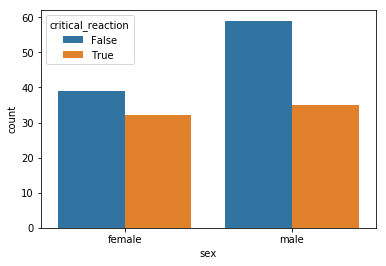

In [23]:
sns.countplot(x='sex', hue='critical_reaction', data=df_all)

In [24]:
# Chi-squared test of male/female proportions

cross = pd.crosstab(df_all['sex'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of sex vs hallelujah reaction proportions')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
sex,,
female,39,32
male,59,35


Chi-squared test of sex vs hallelujah reaction proportions
Test statistic: 0.7306
p-value: 0.3927
Degrees of freedom: 1


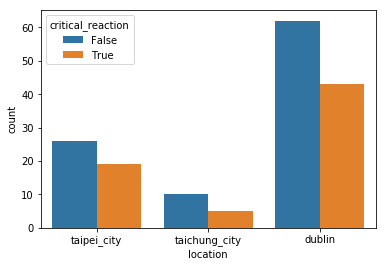

In [25]:
sns.countplot(x='location', hue='critical_reaction', data=df_all)

In [26]:
# Chi-squared test of location proportions

cross = pd.crosstab(df_all['location'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of location vs hallelujah reaction proportions')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
location,,
dublin,62,43
taichung_city,10,5
taipei_city,26,19


Chi-squared test of location vs hallelujah reaction proportions
Test statistic: 0.3829
p-value: 0.8258
Degrees of freedom: 2


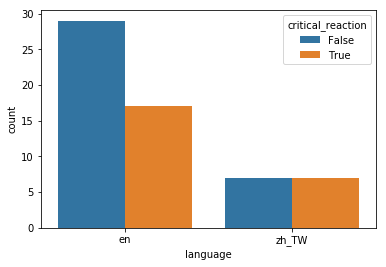

In [27]:
sns.countplot(x='language', hue='critical_reaction', data=df_all)

In [28]:
# Chi-squared test of language proportions

cross = pd.crosstab(df_all['language'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of language vs hallelujah reaction proportions (for Taiwanese, English, and NA)')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
language,,
en,29,17
zh_TW,7,7


Chi-squared test of language vs hallelujah reaction proportions (for Taiwanese, English, and NA)
Test statistic: 0.3144
p-value: 0.5750
Degrees of freedom: 1


Sources for Hotelling's $T^2$:
- https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hotellings_Two-Sample_T2.pdf
- https://onlinecourses.science.psu.edu/stat505/node/100/

In [29]:
def hotelling_t2(X_1, X_2, alpha):
    
    import scipy.stats as sps
    
    n_1 = len(X_1)
    n_2 = len(X_2)

    y_1 = X_1.mean().as_matrix()
    y_1 = y_1.reshape(len(y_1), -1)
    y_2 = X_2.mean().as_matrix()
    y_2 = y_2.reshape(len(y_2), -1)

    # Covariance matrices
    S_1 = np.cov(X_1.astype(np.float64).T)
    S_2 = np.cov(X_2.astype(np.float64).T)

    # Pooled variance
    S_pooled_num = ((n_1 - 1) * S_1) + ((n_2 - 1) * S_2)
    S_pooled_denom = n_1 + n_2 - 2
    S_pooled = S_pooled_num / S_pooled_denom
    
    T_2 = (n_1 * n_2) / (n_1 + n_2)
    T_2 = T_2 * np.matmul((y_1 - y_2).T, np.linalg.pinv(S_pooled))
    T_2 = np.matmul(T_2, (y_1 - y_2))
    T_2 = T_2.squeeze()
    
    p = len(X_1.columns)
    F_num = n_1 + n_2 - p - 1
    F_denom = p * (n_1 + n_2 - 2)
    F = (F_num / F_denom) * T_2
    F = F.squeeze()
    
    df_1 = p
    df_2 = n_1 + n_2 - p - 1
    F_dist = sps.f(df_1, df_2)
    p_value = F_dist.cdf(F)
    
    # Calculate effect size
    D_2 = ((n_1 + n_2) * T_2) / (n_1 * n_2)
    
    return({
        'T2': T_2,
        'F': F,
        'df': (df_1, df_2),
        'p': p_value,
        'D2': D_2
    })

# Pairwise Hotelling's $T^2$

In [30]:
import itertools

plot_vars = ['song_activity', 
             'song_engagement', 
             'song_familiarity', 
             'song_like_dislike', 
             'song_positivity', 
             'song_tension', 
             'age', 
             'musical_expertise', 
             'concentration', 
             'personality_artistic', 
             'personality_fault', 
             'personality_imagination', 
             'personality_lazy', 
             'personality_nervous', 
             'personality_outgoing', 
             'personality_reserved', 
             'personality_stress', 
             'personality_thorough', 
             'personality_trusting']

pairs = list(itertools.combinations(plot_vars, 2))

results = pd.DataFrame(columns=['p', 'adjustedP', 'F', 'T2', 'df1', 'df2', 'D2'])

for pair in pairs:
    
    test_vars = list(pair)
    test_vars.append('critical_reaction')
    df_pair = df_all[test_vars].dropna()
    df_pair_1 = df_pair[df_pair['critical_reaction'] == False].drop(['critical_reaction'], axis=1)
    df_pair_2 = df_pair[df_pair['critical_reaction'] == True].drop(['critical_reaction'], axis=1)
    
    mardia_result = mardia(df_pair.drop(['critical_reaction'], axis=1), unbiased_cov=True)
    if mardia_result[2]['result']:
        pass

    t2_results = hotelling_t2(df_pair_1, df_pair_2, 0.05)
    p = t2_results['p']
    adjusted_p = p * len(pairs)
    if adjusted_p > 1:
        adjusted_p = 1
        
    row = pd.DataFrame(
        {
            'p': t2_results['p'], 
            'adjustedP': adjusted_p,
            'F': t2_results['F'], 
            'T2': t2_results['T2'], 
            'df1': t2_results['df'][0], 
            'df2': t2_results['df'][1],
            'D2': t2_results['D2']
        }, 
        index=[pair])

    results = pd.concat([results, row])
    
alpha = 0.5
    
with pd.option_context('display.max_rows', None, 'display.float_format', lambda x: '%.5f' % x):
    display('Tests for difference between combined means of {} and {} between hallelujah reaction groups:'.format(pair[0], pair[1]))
    
    if results[results.adjustedP <= alpha].shape[0] > 0:
        display(results)
    else:
        print('No significant results to display')

results.to_csv('hotelling_comparisons_{}.csv'.format(notebook_song_name))

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


'Tests for difference between combined means of personality_thorough and personality_trusting between hallelujah reaction groups:'

No significant results to display


In [31]:
if results[results.adjustedP <= alpha].shape[0] > 0:
    for pair in results.index.values[0:3]:
        g = sns.FacetGrid(df_all[[pair[0], pair[1], 'critical_reaction']], col='critical_reaction', height=6, aspect=1, margin_titles=True)
        g.map(sns.kdeplot, pair[0], pair[1], cmap='Reds', shade=True, shade_lowest=False, alpha=0.65)
        g.savefig('hallelujah_reaction_distributions_{}_{}_{}_by_reaction.pdf'.format(notebook_song_name, pair[0], pair[1]))
else:
    print('No significant results to plot')

No significant results to plot
